In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Number of Gpu available:", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Data preparation

In [3]:
#organizing data so that it can be train, test and validate
#os.chdir('basedata/')
#if os.path.isdir('train/lung') is False:
#    os.makedirs('train/lung')
#    os.makedirs('valid/lung')
#    os.makedirs('test/lung')
#    
#    for c in random.sample(glob.glob('lung*'), 9437):
#        shutil.move(c, 'train/lung')
#    for c in random.sample(glob.glob('lung*'), 2696):
#        shutil.move(c, 'valid/lung')
#    for c in random.sample(glob.glob('lung*'), 1349):
#        shutil.move(c, 'test/lung')
        
#os.chdir('../../')

In [4]:
train_path = 'basedata/train'
valid_path = 'basedata/valid'
test_path = 'basedata/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), classes=['lung'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['lung'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(224,224), classes=['lung'], batch_size=10, shuffle=False)


Found 9437 images belonging to 1 classes.
Found 2696 images belonging to 1 classes.
Found 1349 images belonging to 1 classes.


In [6]:
assert train_batches.n == 9437
assert valid_batches.n == 2696
assert test_batches.n == 1349
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes ==1

In [7]:
imgs, labels = next(train_batches)

In [8]:
#this function is directly from tensorflow
#This function will plot images in a grid from with 1 row & 10 column
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

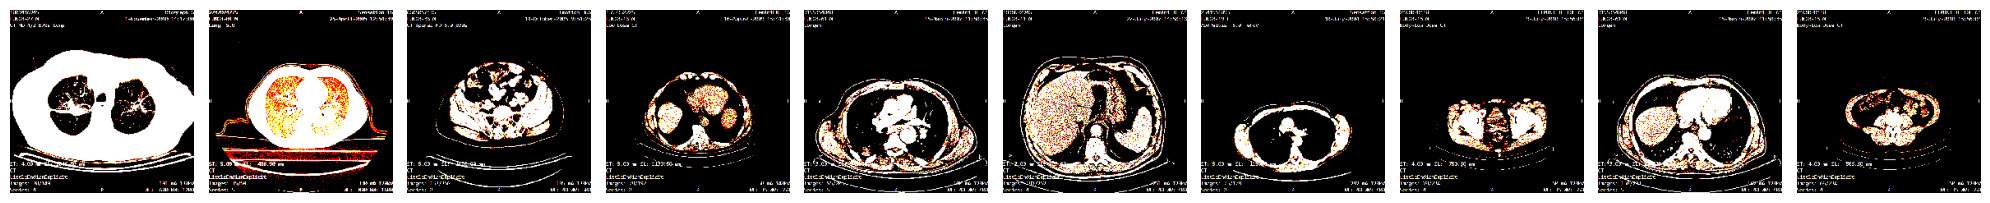

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [9]:
plotImages(imgs)
print(labels)

# Building and training the CNN model

In [12]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=1, activation='softmax'),
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentorpy', metrics =['accuracy'])